In [33]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [34]:
df=pd.read_csv("Housing.csv")

In [35]:
#Encoding the original data accordingly

ordinal=OrdinalEncoder(categories=[["unfurnished","semi-furnished","furnished"]])
df["furnishingstatus"]=ordinal.fit_transform(df[["furnishingstatus"]])

#replacing yes with 1 and no with 0
df[["mainroad","guestroom","basement",
   "hotwaterheating","airconditioning","prefarea"]]=df[["mainroad","guestroom","basement",
                                                      "hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})

C:\Users\anura\AppData\Local\Temp\ipykernel_3232\170063733.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  "hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})


In [36]:
X=df.drop(columns=["price"])
y=df["price"]


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
k_list=np.arange(1,80,1)
knn_mape={}
knn_r2score={}

for i in k_list:
    knn=KNeighborsRegressor(n_neighbors=i)
    model=knn.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mape=mean_absolute_percentage_error(predictions,y_test)
    r2=r2_score(y_test,predictions)
    knn_mape[i]=mape
    knn_r2score[i]=r2

print(min(knn_mape.values()))

0.28017693374872243


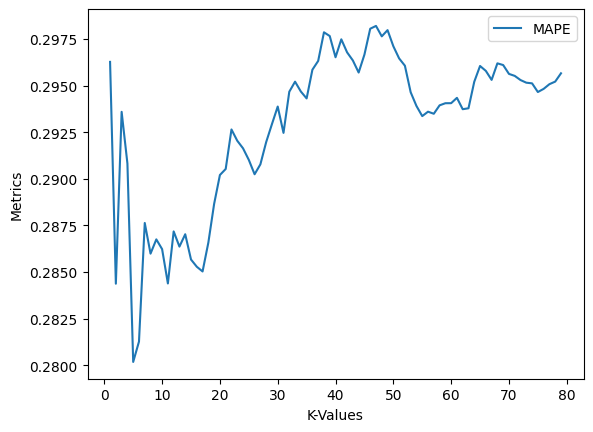

In [38]:
plt.plot(knn_mape.keys(),knn_mape.values(),label="MAPE")
plt.xlabel("K-Values")
plt.ylabel("Metrics")

plt.legend()
plt.show()

#This is to find the best value of the hyperparameter k, for kNN

0.22918439788355224


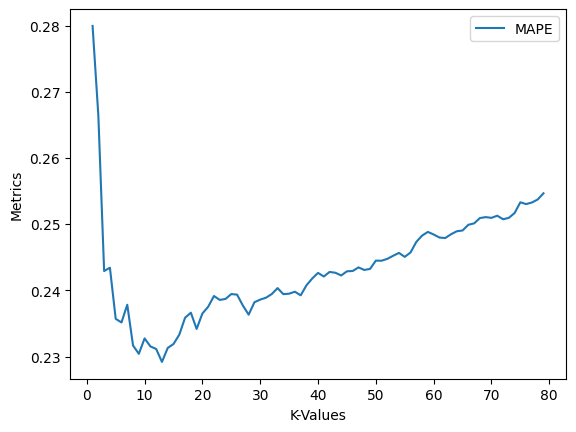

In [39]:
'''Since kNN is sensitive to the scale of the data, this is another test for the same data with
standard scaler'''

scaler=StandardScaler()
X[["area"]]=scaler.fit_transform(X[["area"]])
k_list=np.arange(1,80,1)
knn_mape={}
knn_r2score={}

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


for i in k_list:
    knn=KNeighborsRegressor(n_neighbors=i)
    model=knn.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mape=mean_absolute_percentage_error(predictions,y_test)
    r2=r2_score(y_test,predictions)
    knn_mape[i]=mape
    knn_r2score[i]=r2

print(min(knn_mape.values()))

plt.plot(knn_mape.keys(),knn_mape.values(),label="MAPE")
plt.xlabel("K-Values")
plt.ylabel("Metrics")

plt.legend()
plt.show()